In [1]:
import pandas as pd
import numpy as np

### Load Data

In [2]:
X_train = pd.read_csv('input/train.csv')
X_train.head(5)

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,A8,26,0.230769,2,3,1,0.492537,0.563636,0.225941,...,0,0,0,0,0,0,0,0,0,7
1,1,D2,26,1.000000,3,3,1,0.671642,0.781818,0.326360,...,0,0,0,0,0,0,0,0,0,6
2,1,D2,26,0.230769,2,3,1,0.626866,0.745455,0.393305,...,0,0,0,0,0,0,0,0,0,1
3,1,D4,26,0.230769,2,3,1,0.268657,0.690909,0.246862,...,0,0,0,0,0,0,0,0,0,4
4,1,E1,10,0.230769,2,3,1,0.641791,0.581818,0.466527,...,0,0,1,0,0,0,1,0,0,2


In [3]:
import gc
y_train = X_train['Response']
del X_train['Response']
gc.collect()

20

In [4]:
X_test = pd.read_csv('input/predict.csv')
X_test.head(5)

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,D4,26,0.230769,2,1,1,0.358209,0.709091,0.349372,...,0,0,0,0,0,0,0,0,0,0
1,1,D4,26,1.000000,2,3,1,0.104478,0.836364,0.665272,...,0,0,0,0,0,0,0,0,0,1
2,1,A7,26,0.025641,2,3,1,0.686567,0.781818,0.236402,...,0,0,0,0,0,0,0,0,0,0
3,1,D3,26,1.000000,2,3,1,0.328358,0.690909,0.320084,...,0,0,0,0,0,0,0,0,0,0
4,1,D1,26,0.230769,2,3,1,0.611940,0.836364,0.372385,...,0,1,0,0,0,0,0,0,0,0


In [5]:
# shape of trainning set and test set
print(X_train.shape)
print(X_test.shape)

(58881, 128)
(500, 128)


### Data Overview

In [6]:
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary

In [7]:
des_train = description(X_train)
des_train

,Name,dtypes,Missing,Uniques
0,Product_Info_1,int64,0,2
1,Product_Info_2,object,0,19
2,Product_Info_3,int64,0,34
3,Product_Info_4,float64,0,1482
4,Product_Info_5,int64,0,2
...,...,...,...,...
123,Medical_Keyword_44,int64,0,2
124,Medical_Keyword_45,int64,0,2
125,Medical_Keyword_46,int64,0,2
126,Medical_Keyword_47,int64,0,2


In [8]:
des_test = description(X_test)
des_test

,Name,dtypes,Missing,Uniques
0,Product_Info_1,int64,0,2
1,Product_Info_2,object,0,16
2,Product_Info_3,int64,0,8
3,Product_Info_4,float64,0,41
4,Product_Info_5,int64,0,2
...,...,...,...,...
123,Medical_Keyword_44,int64,0,2
124,Medical_Keyword_45,int64,0,2
125,Medical_Keyword_46,int64,0,2
126,Medical_Keyword_47,int64,0,2


##### Here, we can make some conclusions to the summary
    missing value analysis
    data type analysis
    data variance analysis

In [9]:
print('Trainning set:')
print('- There are ',len(des_train['Missing'].unique())-1,' features with missing values;')
print('- There are ',(des_train['dtypes']=='object').sum(),' object-type features;')
print('- There are ',(des_train['dtypes']=='float64').sum(),' float-type features')
print('Name - Missing/Nb_row:')
des_train['Missing'] = des_train['Missing']/X_train.shape[0]
print(des_train[des_train['Missing']!=0].sort_values(by=['Missing'],ascending=False)[['Name','Missing']])

Trainning set:
- There are  15  features with missing values;
- There are  4  object-type features;
- There are  18  float-type features
Name - Missing/Nb_row:
                   Name   Missing
48   Medical_History_10  0.990642
70   Medical_History_32  0.981318
62   Medical_History_24  0.935939
24        InsuredInfo_8  0.879197
53   Medical_History_15  0.750972
25        InsuredInfo_9  0.749410
38        Family_Hist_5  0.703996
36        Family_Hist_3  0.576621
35        Family_Hist_2  0.482702
30  Insurance_History_5  0.427642
37        Family_Hist_4  0.323177
16    Employment_Info_6  0.182623
39    Medical_History_1  0.149607
14    Employment_Info_4  0.114078
11    Employment_Info_1  0.000323


In [10]:
print('Test set:')
print('- There are ',len(des_test['Missing'].unique())-1,' features with missing values')
print('- For each feature, there are ',des_test['Missing'].unique()[1:],' values are missing;')
print('Name - Missing/Nb_row:')
des_test['Missing'] = des_test['Missing']/X_test.shape[0]
print(des_test[des_test['Missing']!=0].sort_values(by=['Missing'],ascending=False)[['Name','Missing']])

Test set:
- There are  14  features with missing values
- For each feature, there are  [ 62 101 451 371 216 234 289 155 359  80 494 378 471 493]  values are missing;
Name - Missing/Nb_row:
                   Name  Missing
48   Medical_History_10    0.988
70   Medical_History_32    0.986
62   Medical_History_24    0.942
24        InsuredInfo_8    0.902
53   Medical_History_15    0.756
25        InsuredInfo_9    0.742
38        Family_Hist_5    0.718
36        Family_Hist_3    0.578
35        Family_Hist_2    0.468
30  Insurance_History_5    0.432
37        Family_Hist_4    0.310
16    Employment_Info_6    0.202
39    Medical_History_1    0.160
14    Employment_Info_4    0.124


##### Have a look at the 'object' data and 'float64' data

In [11]:
X_train[X_train.columns[(X_train.dtypes == 'object')==True]].head(5)

,Product_Info_2,InsuredInfo_7,InsuredInfo_8,InsuredInfo_9
0,A8,Female,NaN,Muslim
1,D2,Male,NaN,NaN
2,D2,Male,Caucasian,Jewish
3,D4,Female,NaN,NaN
4,E1,Female,NaN,NaN


In [12]:
X_train[X_train.columns[(X_train.dtypes == 'float64')==True]].head(5)

,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_10,Medical_History_15,Medical_History_24,Medical_History_32
0,0.230769,0.492537,0.563636,0.225941,0.510720,0.0244,0.0,0.05,NaN,0.681159,NaN,0.492958,NaN,0.0,NaN,NaN,NaN,NaN
1,1.000000,0.671642,0.781818,0.326360,0.453033,0.5000,0.5,1.00,0.006667,NaN,0.490196,NaN,0.589286,4.0,NaN,196.0,196.0,NaN
2,0.230769,0.626866,0.745455,0.393305,0.598310,0.0400,0.0,0.60,0.000833,NaN,0.558824,NaN,0.598214,3.0,NaN,240.0,NaN,NaN
3,0.230769,0.268657,0.690909,0.246862,0.410638,0.0300,0.0,0.00,NaN,0.536232,NaN,0.478873,NaN,12.0,NaN,NaN,NaN,NaN
4,0.230769,0.641791,0.581818,0.466527,1.000000,0.0280,0.0,1.00,0.000039,NaN,0.647059,NaN,0.160714,1.0,NaN,NaN,NaN,NaN


##### Have a look at the variance for the numerical features

In [13]:
tabel_var = X_train[X_train.columns].var().sort_values(ascending=True)
tabel_var.head(20)

Insurance_History_5    0.000054
Employment_Info_4      0.001083
Medical_History_35     0.004106
Medical_History_38     0.004817
Ht                     0.005513
Medical_Keyword_13     0.005892
Medical_Keyword_9      0.006580
Employment_Info_1      0.006803
Medical_Keyword_38     0.006814
Product_Info_5         0.006898
Medical_Keyword_35     0.006898
InsuredInfo_2          0.007400
Medical_History_5      0.007401
Medical_Keyword_18     0.007417
Medical_Keyword_44     0.007467
Medical_Keyword_14     0.007785
Wt                     0.007923
Medical_Keyword_20     0.008019
Medical_Keyword_46     0.008403
Medical_Keyword_5      0.008537
dtype: float64

##### As we can see above, 
    - there're 15 features with missing values in trainning set and 14 features with missing values in test set:
        a. for the feature with few missing values, perhaps we can use interpolation to fill them;
        b. for the features with many missing values (missing rate>0.6), perhaps we can delete them directly, they are:
            Medical_History_10  0.990642
            Medical_History_32  0.981318
            Medical_History_24  0.935939
            InsuredInfo_8  0.879197
            Medical_History_15  0.750972
            InsuredInfo_9  0.749410
            Family_Hist_5  0.703996
            
    - there're 4 object-type features, we need to enlabel them;
    - there're 18 float-type features, it's poosible to enlabel them by different intervals;
    - there's no object value in the form of timestamp in the dataset;
    - from variance table, we can see that there're many features with low variance, that is to say, the values in these features are nearly fix, which is meaningless, perhaps we can delete some of this kind of features.

### Data Visualisation

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Distribution of the labels

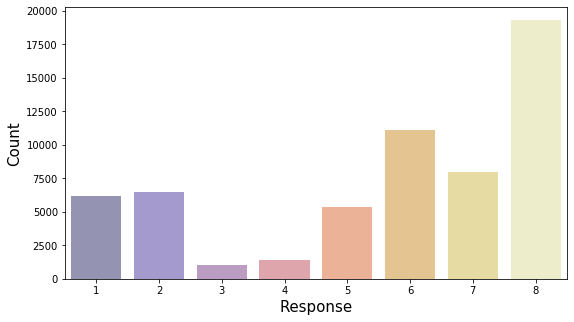

In [15]:
plt.rcParams['figure.figsize'] = (9, 5)
ax = sns.countplot(data = X_train, x =y_train, palette = 'CMRmap', alpha = 0.5)
ax.set_ylabel('Count', fontsize = 15)
ax.set_xlabel('Response', fontsize = 15)
plt.show()

##### Correlation among the features

In [16]:
corr_table1 = X_train.corr()
corr_table1.head(5)

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
Product_Info_1,1.000000,0.027390,0.059485,0.070362,-0.077933,0.012329,-0.077381,0.052656,-0.004126,-0.037157,...,0.001550,-0.003042,0.004687,-0.007505,-0.013998,-0.008218,-0.006712,-0.010611,0.004504,-0.008348
Product_Info_3,0.027390,1.000000,0.049340,0.025406,-0.019366,0.016892,0.000940,0.293447,0.213485,0.083147,...,-0.046342,-0.040123,-0.000364,-0.037409,0.034633,0.002486,-0.053368,-0.001354,-0.017369,0.045673
Product_Info_4,0.059485,0.049340,1.000000,0.040667,-0.089163,0.051572,-0.260714,0.141718,-0.028290,-0.129655,...,-0.016578,-0.021618,-0.015700,-0.041478,-0.038767,-0.002469,-0.020078,-0.047227,-0.022064,-0.031440
Product_Info_5,0.070362,0.025406,0.040667,1.000000,-0.044950,0.019684,0.006753,0.054554,0.022785,-0.004751,...,-0.004573,-0.008208,0.012117,-0.005498,0.001284,-0.004915,-0.002845,-0.005501,-0.000237,0.004215
Product_Info_6,-0.077933,-0.019366,-0.089163,-0.044950,1.000000,-0.016066,-0.031052,-0.032768,0.014231,0.038979,...,-0.008874,0.017570,-0.009088,0.009511,-0.009696,-0.000367,-0.002348,0.002231,-0.009926,-0.003551


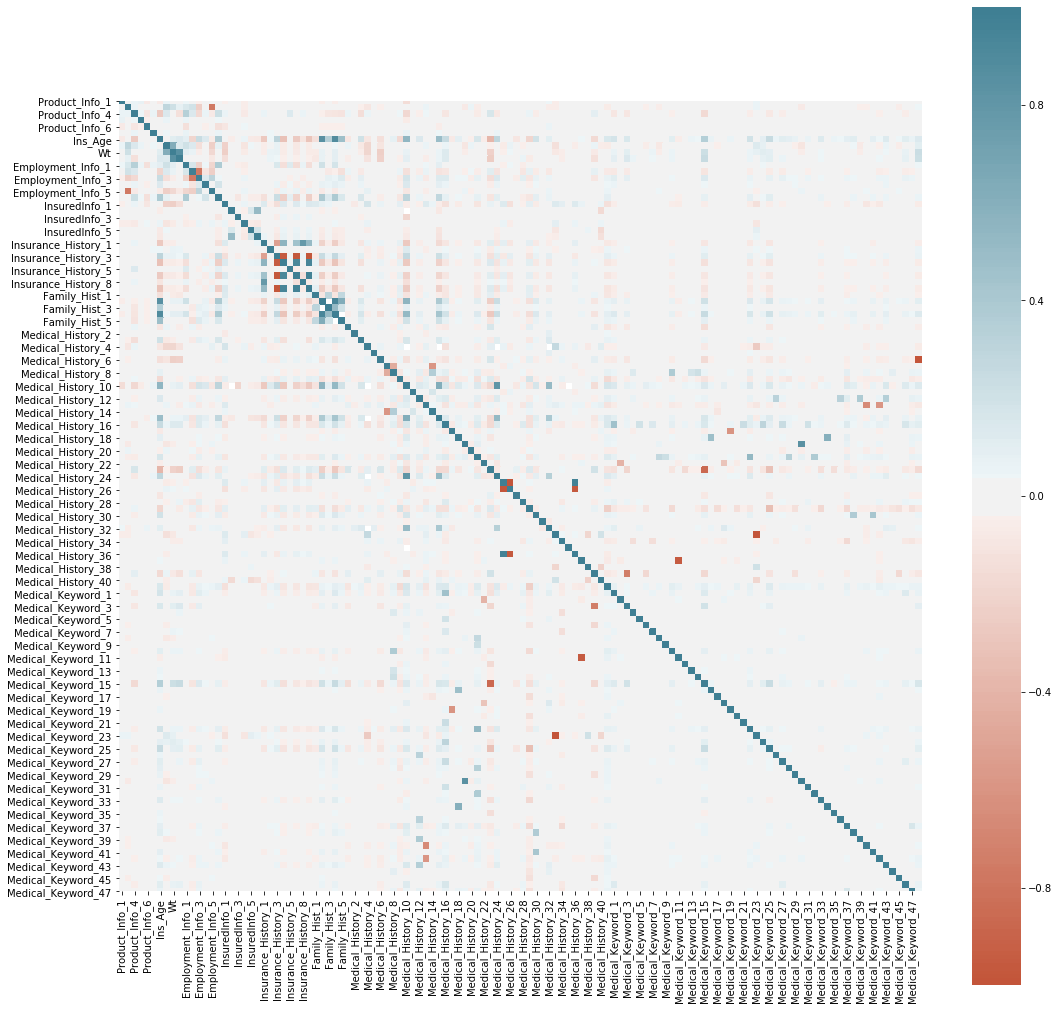

In [17]:
plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(corr_table1, vmin=-1, vmax=1, center=0,
            square=True,cmap = sns.diverging_palette(20, 220, n=200))
plt.show()

        for the feature pairs with high correlation (no metter negative or positive), perhaps we can delete some of them afterwards because some models are sensible to the features with high correlation.

##### Correlation between label and features

In [18]:
X_temp = X_train
X_temp['Response'] = y_train
X_temp = X_temp.corr()
tabel_corr2 = abs(X_temp[['Response']]).sort_values(by=['Response'],ascending=False)
del X_temp
gc.collect()

10569

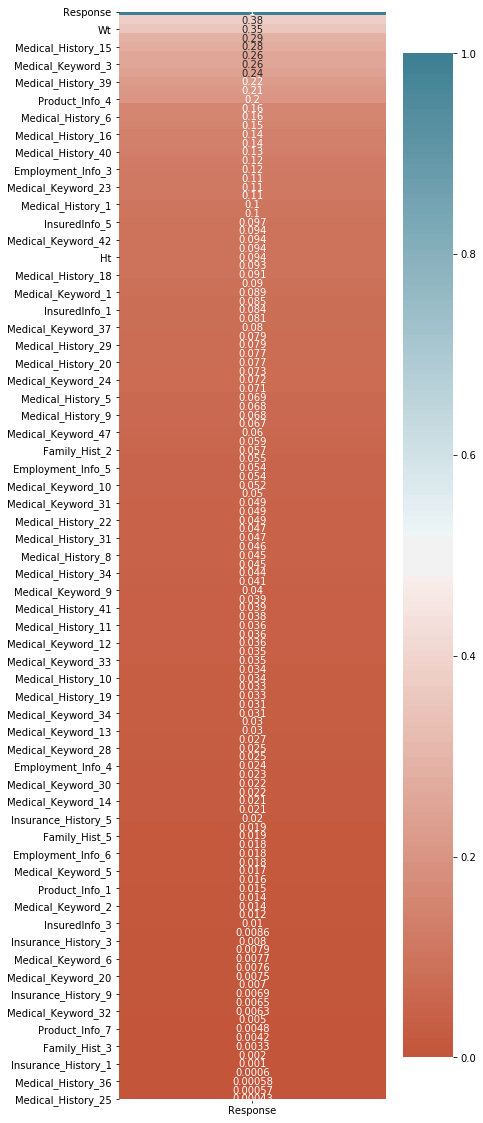

In [19]:
plt.figure(figsize=(6,20))
sns.heatmap(tabel_corr2,
            vmin=0,
            cmap = sns.diverging_palette(20, 220, n=200),
            annot=True)
plt.show()

In [20]:
# 10 features with least correlation to the label
tabel_corr2[-10:]

,Response
Medical_Keyword_45,0.004952
Product_Info_7,0.004825
Medical_Keyword_8,0.004202
Family_Hist_3,0.003265
Product_Info_5,0.002011
Insurance_History_1,0.001034
Medical_History_26,0.000601
Medical_History_36,0.000580
Insurance_History_4,0.000567
Medical_History_25,0.000428


     for the features with low correlation to the label, it's possible to delete them afterwards

##### a glance at the distribution of training data and test data

In [42]:
train_null = X_train.isnull().sum(axis=1)
train_null_distribution = pd.DataFrame(train_null.value_counts())
train_null_distribution.reset_index(inplace=True)
train_null_distribution.head(5)

,index,0
0,8,19929
1,9,15723
2,7,11195
3,10,6515
4,6,3156


In [44]:
test_null = X_test.isnull().sum(axis=1)
test_null_distribution = pd.DataFrame(test_null.value_counts())
test_null_distribution.reset_index(inplace=True)
test_null_distribution.head(5)

,index,0
0,8,150
1,9,143
2,7,94
3,10,62
4,6,31


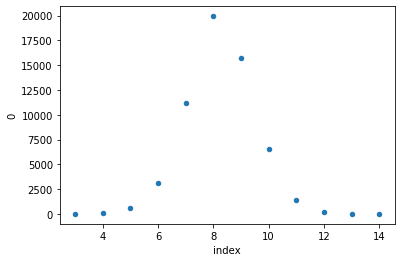

In [46]:
train_null_distribution.plot.scatter(x='index',y=0)

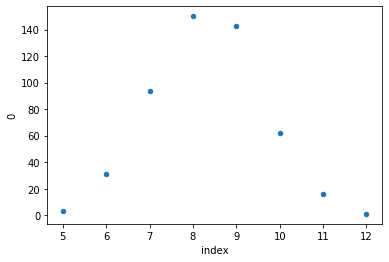

In [47]:
test_null_distribution.plot.scatter(x='index',y=0)